In [ ]:
! gdown 1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
To: /content/requirements.txt
100% 424/424 [00:00<00:00, 1.81MB/s]


In [ ]:
import catboost
assert(catboost.__version__ == '1.2.1')

-----------
<font color="white" style="opacity:0.2023"></font>

In [ ]:
import pandas as pd

In [ ]:
!gdown 1sA-fqJb1WxhS_jaYDcIwXWa_b8b2oZJ6

Downloading...
From: https://drive.google.com/uc?id=1sA-fqJb1WxhS_jaYDcIwXWa_b8b2oZJ6
To: /content/youtube_trending_mediterranean.csv
100% 6.22M/6.22M [00:00<00:00, 245MB/s]


# Часть 1. Анализ данных

#### Открытие файла с таблицей, вывод последних 5 строк и информации о таблице.


In [ ]:
data = pd.read_csv("/content/youtube_trending_mediterranean.csv")
data.tail(n=5)

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
3216,NaN,eB-A1Y0Dswc,Thank you for watching,2022-07-05T21:18:33Z,UCS5tt2z_DFvG7-39J3aE-bQ,Life of Boris,22,22.11.07,lifeofboris|life of boris|english subtitles|yellow tracksuit|accent|life of boris youtube|gaming,864216,14431,https://i.ytimg.com/vi/eB-A1Y0Dswc/default.jpg,False,True,New channel: https://www.youtube.com/channel/UCcQdT-hLr2_Fz5J0VqlurKQProudly powered by Patreon: https://patreon.com/lifeofborisTrue Slav Merch Shop: https://www.borismerch.com/Boris chairs and Ga...
3217,NaN,KJGTtzccOHU,Pokemon Emerald but every battle is extremely unfair,2022-07-05T01:55:10Z,UC0VVYtw21rg2cokUystu2Dw,SmallAnt,20,22.11.07,pokemon|smallant|smallant1|challenge|pokemon challenge|is it possible|emerald|pokemon emerald|rse|unfair|1v2,1311698,1232,https://i.ytimg.com/vi/KJGTtzccOHU/default.jpg,False,True,Pokemon emerald but every battle is a 1v2You should watch me live on Twitch:https://twitch.tv/Smallantâ¶Discord: https://discord.gg/Smallantâ¶Twitter: https://twitter.com/Smallantâ¶Reddit: http...
3218,NaN,be8mqaTi_DI,Victor Cibrian x Fuerza Regida x Luis R Conriquez - Por Apodo Soy Sobrino [En Vivo],2022-07-04T21:00:36Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,22.11.07,Rancho Humilde|Legado 7|El De La Guitarra|Fuerza Regida|Banda|Musica Mexicana|Regional Mexicano|Herencia De Patrones|Luis R Conriquez|Victor Cibrian|La Decima Banda|Kartel Music|Street Mob|Rancho|...,2256933,597,https://i.ytimg.com/vi/be8mqaTi_DI/default.jpg,False,True,SuscrÃ­bete: https://Rancho.lnk.to/RHYoutube\rVictor Cibrian x Fuerza Regida x Luis R Conriquez - Por Apodo Soy Sobrino [En Vivo]\r\rVictor Cibrian x Fuerza Regida x Luis R Conriquez - Por Apodo S...
3219,NaN,14aYHc7ybu0,WE STAYED AT A 1 STAR HOTEL FOR 24 HOURS | cockroach scare,2022-07-05T13:40:04Z,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,22.11.07,hjevelyn|Evelyn ha|Emily ha|erica ha|korean siblings|korean sisters|siblings|hjevelyn room tour|hjevelyn speaking in korean|hjevelyn nyc|nyc|New York city|blackpink|kpop|BTS|24 hour challenges|Mic...,922668,2951,https://i.ytimg.com/vi/14aYHc7ybu0/default.jpg,False,True,never again ahaha.... CHECK OUT OUR MERCH: https://fanjoy.co/collections/hasistersð· INSTAGRAM: @hasistersofficialhttps://www.instagram.com/hasistersofficial/Personals:ð·INSTAGRAM: @hjevelyn h...
3220,NaN,mQ9eFI13NCQ,"I 100%'d Cuphead: The Delicious Last Course, Here's What Happened",2022-07-04T16:04:33Z,UCRgzckrm1Svf-Y_dIWsTPTg,The Andrew Collette Show,20,22.11.07,cuphead|cuphead dlc|cuphead the delicious last course|the cuphead show|cuphead all bosses|the delicious last course|cuphead gameplay|cuphead dlc gameplay|cuphead the delicious last course gameplay...,1176289,620,https://i.ytimg.com/vi/mQ9eFI13NCQ/default.jpg,False,True,My Cuphead: The Delicious Last Course Let's Play throughout inkwell Isle Four! Was the cuphead DLC worth the wait? Can I do a Cuphead DLC 100 percent run?LIVE CHANNEL âºâº https://bit.ly/3yhMPA...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            3021 non-null   object
 1   video_id           3221 non-null   object
 2   title              3221 non-null   object
 3   publishedAt        3221 non-null   object
 4   channelId          3221 non-null   object
 5   channelTitle       3221 non-null   object
 6   categoryId         3221 non-null   int64 
 7   trending_date      3221 non-null   object
 8   tags               3221 non-null   object
 9   view_count         3221 non-null   int64 
 10  comment_count      3221 non-null   int64 
 11  thumbnail_link     3221 non-null   object
 12  comments_disabled  3221 non-null   bool  
 13  ratings_disabled   3221 non-null   bool  
 14  description        3090 non-null   object
dtypes: bool(2), int64(3), object(10)
memory usage: 333.5+ KB


####Анализ данных:

* Для скольких стран есть информация о видеороликах в таблице?
* Сколько есть видеороликов c разрешенными и запрещенными комментариями?
* Какое максимальное число просмотров у видеороликов, попавших в таблицу?

In [ ]:
data["country"].nunique(dropna=True)
data["comments_disabled"].value_counts(dropna=True)
data["view_count"].max()

123034293


1. 19 стран
2. Запрещенными    3193
   Разрешенными       28
3. 123034293



####Есть ли в данных пропуски? В каких колонках?



In [ ]:
tmp = data.isnull()
for col in tmp.columns:
  if tmp[col].any():
    print(col)


country
description


Пропуски есть колонках country, description

#### Заполнение пропусков пустой строкой для текстовых колонок и удаление строк с пропусками для колонок с категориальными значениями:


In [ ]:
# считаю, что строковая пустая - description, пустая категориальная - country (согласно примененному выше методу info())
data["description"].fillna(value="It's a video!")
data.dropna()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,2022-07-07T22:00:12Z,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,22.11.07,[none],5130167,3641,https://i.ytimg.com/vi/hxWSp-8jJuo/default.jpg,False,True,Stream or Download now ''KATILE'' ð https://avd.lnk.to/KatileStoresDON XHONI on Instagram: https://www.instagram.com/don_xhoni/âMusic produced by Ãelik Lipa (SBS Ent.)Lyrics by Don XhoniDire...
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official Video),2022-06-30T22:00:11Z,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,22.11.07,[none],8886648,4414,https://i.ytimg.com/vi/MnrC9mk2H1o/default.jpg,False,True,The official video for GAJDE.Stream/Download GAJDE: https://dhuratadoraxelvanagjata.lnk.to/GAJDE.â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬â¬FOLLOW DHURA...
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,2022-07-02T22:00:11Z,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,22.11.07,Butrint Imeri|Kida|Dale|Butrint imeri kida|Butrinti kida 2022|Ampm|Zemren ma kalle|Butrint kida zemren|Ma kalle|Butrint Imeri Kida AM PM|Am|Pm|Qa je ti|Qa je qa je ti|Dreqi qe je ti|Uhhh ahhh butr...,7230818,7518,https://i.ytimg.com/vi/5Ql-G0dTqC0/default.jpg,False,True,Stream or Download âAM/PMâ here ð§ https://avd.lnk.to/AMPMStoresMusic produced by Ãelik Lipa (SBS Ent.)Video by FATI.TV00:00 - KIDA x BUTRINT IMERI - AM01:55 - KIDA x BUTRINT IMERI - PMKIDA...
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,2022-07-07T22:00:12Z,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,22.11.07,Dafina|Zeqiri|Dafine Moj|Pa ty|Lule Lule|Duro|Vuj Vuj Vuj|Aman|Llafe Llafe|luje belin|dashni|malli,1406078,827,https://i.ytimg.com/vi/oUdY0qSavvY/default.jpg,False,True,Bzzz Entertainment - https://lnk.to/BzzzStream/Download - https://dafinazeqiri.lnk.to/MalliFollow @Dafina Zeqiri - https://lnk.to/DafinaZeqiriMusic & Produced by: BIGDEAL RECORDSMix & Master by: B...
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,2022-06-30T18:00:26Z,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,22.11.07,tayna|Friends|Entertainment|rinor hykolli|hip hop|shqip|ring ring|tayna doruntina|caliente|cricket|tayna kce|tayna pow pow|tayna columbiana|tayna bass|mozzik,6397676,6063,https://i.ytimg.com/vi/I4ZSvYLnOcQ/default.jpg,False,True,"Stream âTequilaâ:https://taynaxazet.lnk.to/TequilaMusic & Produced by: CricketLyrics and melody by: MUMA , TAYNA, AZETMix by: CricketMaster by: Nome EntVideo by: SecuencaExecutive Producer: Ri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,TR,2bvhzLli-Aw,FenerbahÃ§e 3-0 Mol Fehervar | HazÄ±rlÄ±k MaÃ§Ä±,2022-07-05T18:46:34Z,UCpdSUUHlxMjO0c5824FGcsA,S Sport,17,22.11.07,fenerbahÃ§e Ã¶zet|fenerbahÃ§e|fb|fenerbahÃ§e hazÄ±rlÄ±k maÃ§Ä±|fenerbahÃ§e gol|fenerbahÃ§e 2022|fener|fb gol|irfan can kahveci|jorge jesus|serdar dursun|serdar dursun gol|diego rossi|enner valenci...,492614,683,https://i.ytimg.com/vi/2bvhzLli-Aw/default.jpg,False,True,"FenerbahÃ§e hazÄ±rlÄ±k maÃ§Ä±nda Mol Fehervar'Ä±, Serdar Dursun, Diego Rossi ve Enner Valencia'nÄ±n golleriyle 3-0 maÄlup etmeyi baÅardÄ±!KanalÄ±mÄ±za abone olun: https://www.youtube.com/channel..."
3017,TR,imjlTtCxkkk,Brawl Stars Season 13! - #DeepSeaBrawl,2022-07-04T09:00:09Z,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,22.11.07,brawl stars|mobile game|mobile strategy game|mobile rpg|mobile battle royale|battle royale|supercell game|deep sea brawl|season 13|deepseabrawl|otis|brawl pass,1062053,1745,https://i.ytimg.com/vi/imjlTtCxkkk/default.jpg,False,True,Download NOW!! âºâº https://supr.cl/2K62CZGBe a BRAWLER! Subscribe! âºâº https://supr.cl/subscribeAn epic battle royale made for mobile! Play with friends or solo across a variety of game mode...
3018,TR,rdAhWgxtteY,GÃ¶rÃ¼lmemiÅ Bir Ekonomik Kriz Geliyor- DÃ¼nyanÄ±n Haberi 268 - 03.07.2022,2022-07-03T20:00:18Z,UC9PfAU8pdnTs7afxIXKhgVA,Erkan Ãz,25,22.11.07,erkan Ã¶z yorumlar


#### Анализ колонки publishedAt
* Изменение типа колонки publishedAt на datetime
* В какой месяц было добавлено больше всего видеороликов?



In [ ]:
data["publishedAt"].dtype
data["publishedAt"] = pd.to_datetime(data["publishedAt"])
data["publishedAt"].dt.month.value_counts()

7    2153
6    1068
Name: publishedAt, dtype: int64


1.
2. 2153 видео в июле

#### Анализ колонки description

* Перевод строк в колонке description в нижний регистр и удаление ненужных пробелов справа и слева.
* Замена url-адреса в описаниях на специальный тэг \<URL\>.
* Вывод полностью description для видеоролика с video_id = 'Oxexirlmdig'.



In [ ]:
pattern = r'http\S+'

In [ ]:
data.loc[:, "description"].str.lower().str.strip().str.replace(pattern, "<URL>", regex=True)
pd.options.display.max_colwidth = 200
data[data["video_id"] == "Oxexirlmdig"].iloc[:, 14]

12    Music line & Lyrics : GHETTO GEASY & MAJKMusic Produced : BIGDEAL RECORDS Mix & Master: BIGDEAL RECORDSAvailable on:Spotify: https://open.spotify.com/album/3qmQlAeQM4j86NMEzCWyX4iTunes: https://mu...
Name: description, dtype: object

#### Какие 5 роликов набрали в Италии (country='IT') наибольшее число просмотров?


In [ ]:
data.sort_values(by="view_count", ascending=False)[data["country"] == "IT"].iloc[:5, [0, 5, 9]]

,country,channelTitle,view_count
1630,IT,That Little Puff,82864422
1599,IT,SMTOWN,47227373
1570,IT,Celine & Michiel,37011562
1631,IT,SportsNation,31997011
1656,IT,BeatboxJCOP,28036908


<br>That Little Puff <br> SMTOWN<br> Celine & Michiel<br> SportsNation<br> BeatboxJCOP


#### Какой видеоролик был опубликован в наибольшем кол-ве стран?



In [ ]:
data.groupby("title", dropna=True)["country"].count().sort_values(ascending=False).head(1)

title
Race Highlights | 2022 British Grand Prix    17
Name: country, dtype: int64

Race Highlights | 2022 British Grand Prix

#### Какое максимальное число просмотров у видеороликов, выпущенных во Франции или Италии (в колонке country значениe FR или IT) в июле (колонка publishedAt)?



In [ ]:
data["view_count"][((data["country"] == "IT") | (data["country"] == "FR")) & (data["publishedAt"].dt.month == 7)].max()

82864422

####  Предположим, что была допущена ошибка, и все видеоролики из 17 категории, относятся к 16 категории. Исправим нужные значения в колонке categoryId, после чего выведем все уникальные категории.



In [ ]:
data[data["categoryId"] == 17]
data.loc[lambda d: d["categoryId"] == 17, "categoryId"] = 16
data["categoryId"].unique()

array([24, 10,  1, 15, 22, 23, 27, 16, 20, 26, 25,  2, 19, 28])

#### Анализ колонки tags.

* Замена строк со значением '[none]' на пустую строку.
* Какой самый популярный тэг?


In [ ]:
pattern = '[none]'
data.loc[data["tags"] == pattern, "tags"] = ""
data["tags"].apply(lambda d: d.strip().lower().split('|')).explode("tags").value_counts().sort_values(ascending=False).head(2)

             616
challenge    140
Name: tags, dtype: int64

challenge - самый популярный тэг

# Часть 2. Визуализация данных

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

### График (line plot) зависимости кол-ва выпущенных роликов от даты публикации.



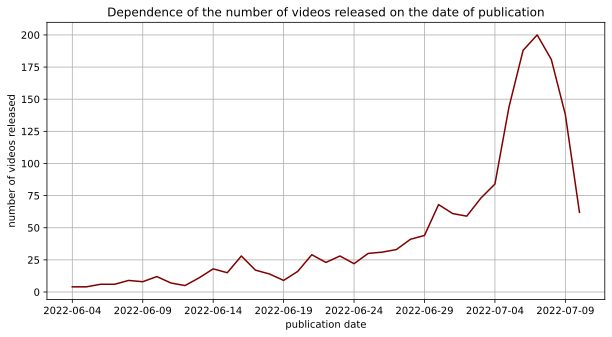

In [ ]:

plt.figure(figsize=(10,5))


plt.title('Dependence of the number of videos released on the date of publication',
          fontsize=12)


plt.grid(True)


plt.xlabel("publication date")
plt.ylabel("number of videos released")

data.drop_duplicates('title')

info = data.groupby(data['publishedAt'].dt.date)['title'].nunique()
plt.plot(info.index, info.values, color = 'maroon')
plt.xticks(info.index[::5])

plt.show()

### Диаграмма (bar plot) кол-ва опубликованных роликов в зависимости от страны.

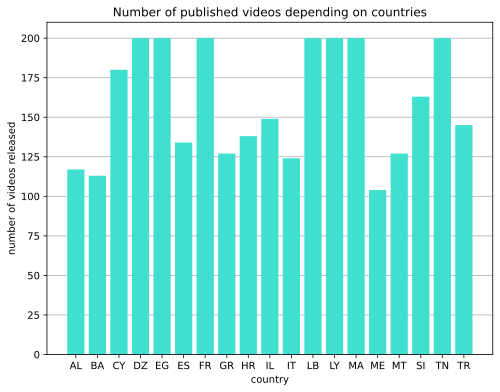

In [ ]:

plt.figure(figsize=(8, 6))


plt.title('Number of published videos depending on countries', fontsize=12)


plt.grid(axis = 'y', zorder = 1)


plt.xlabel("country")
plt.ylabel("number of videos released")

info = data.groupby('country')['title'].nunique()
plt.bar(info.index, info.values, color = 'turquoise', zorder = 2)
plt.show()

### График (scatter plot) зависимости кол-ва комментариев для ролика от кол-ва просмотров для роликов во Франции (country='FR'). Какой характер зависмости получился?

correlation = 0.9713385517304194


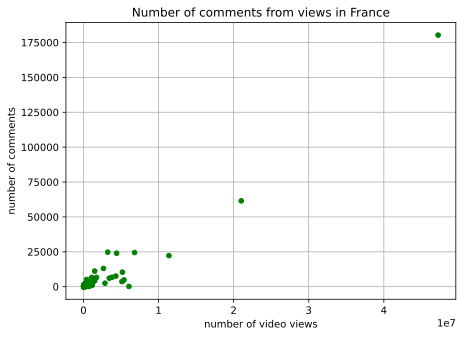

In [ ]:

plt.figure(figsize=(7, 5))


plt.title('Number of comments from views in France', fontsize=12)


plt.grid(zorder = 1)


plt.xlabel("number of video views")
plt.ylabel("number of comments")

info = data[(data['country'] =='FR') & (data['comments_disabled'] == False)]
plt.scatter(info['view_count'], info['comment_count'], color = 'green', s = 22, zorder = 2)

correlation = info['view_count'].corr(info['comment_count'])
print('correlation =', correlation)

plt.show()


Линейный график зависимости.